In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Day-1/after_day1.csv')
df.head()

,Unnamed: 0,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,0,1001,50,Male,UK,Sales Associate,HR,14,47,No,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [3]:
df.drop(["Unnamed: 0"], axis= 1, inplace= True)

In [4]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(numerical_cols, categorical_cols)

['EmployeeID', 'Age', 'YearsAtCompany', 'WorkHoursPerWeek', 'BurnoutLevel', 'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours', 'PhysicalActivityHrs', 'CommuteTime', 'ManagerSupportScore', 'MentalHealthDaysOff', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore', 'BurnoutRisk'] ['Gender', 'Country', 'JobRole', 'Department', 'RemoteWork', 'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']


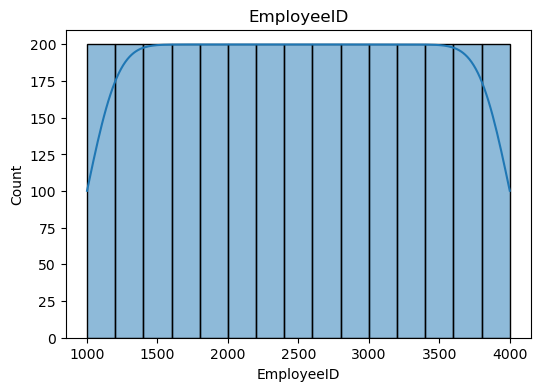

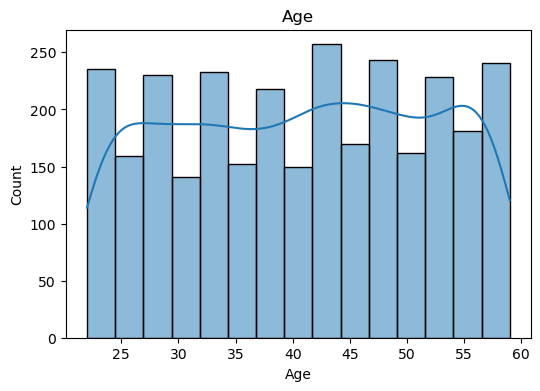

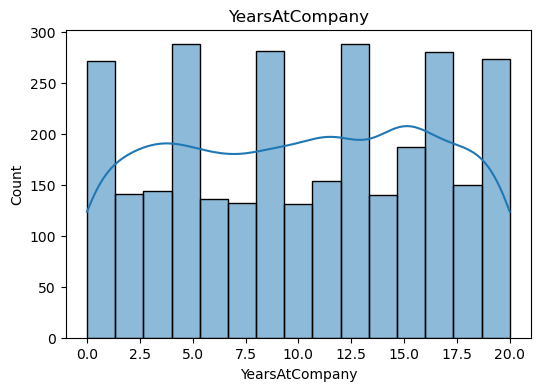

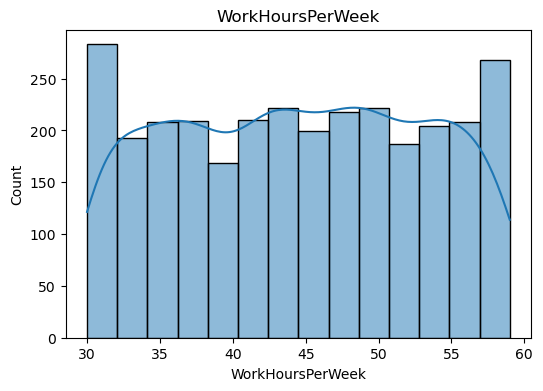

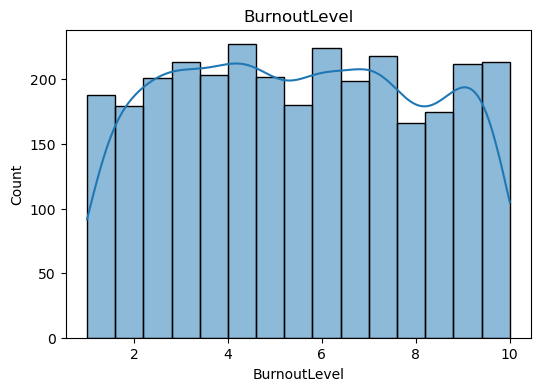

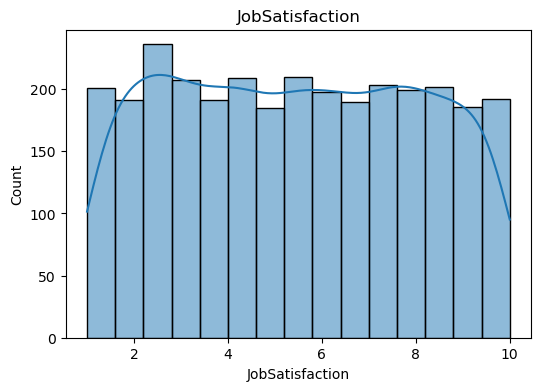

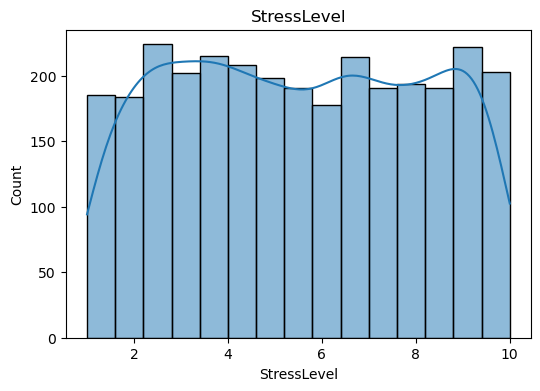

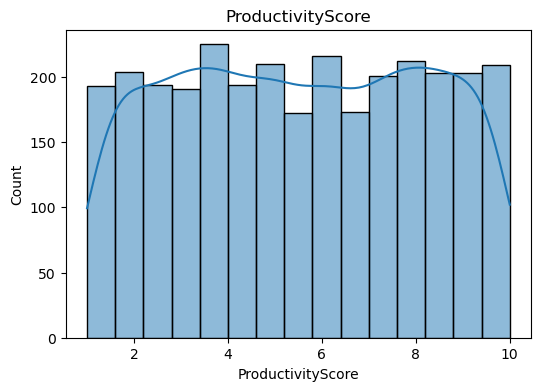

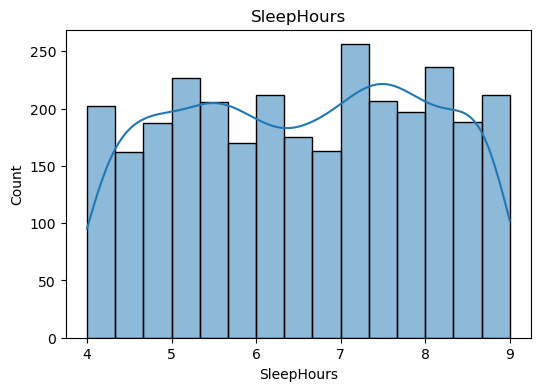

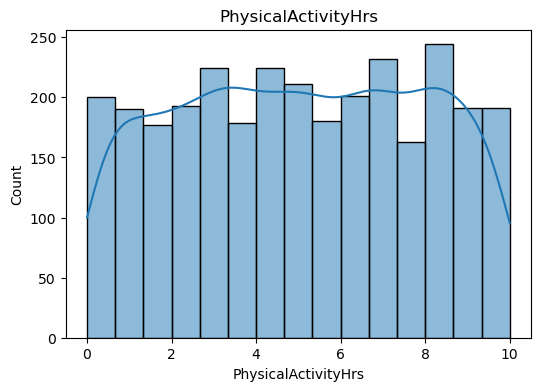

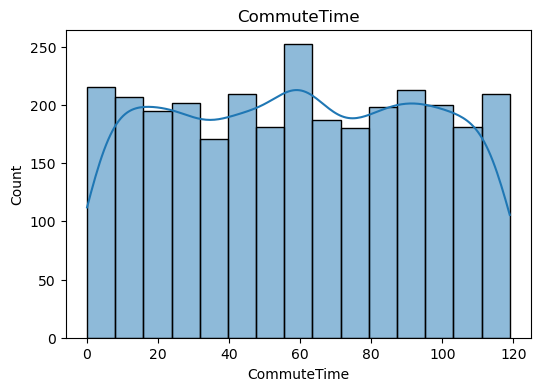

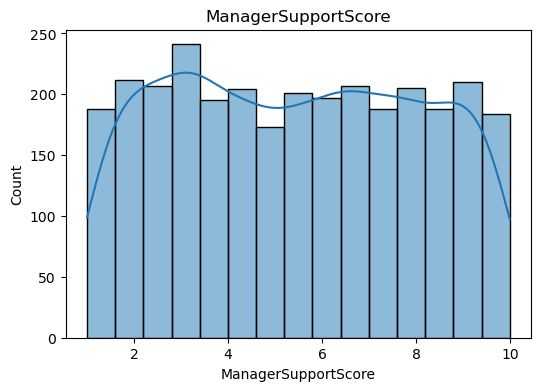

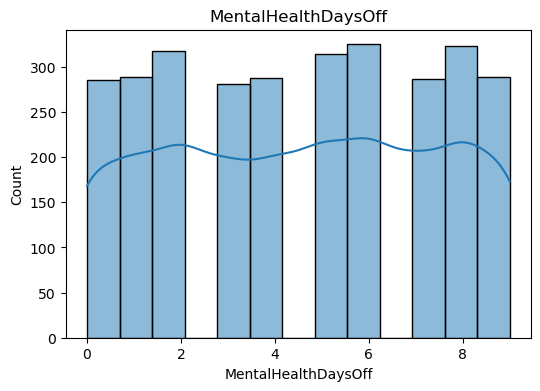

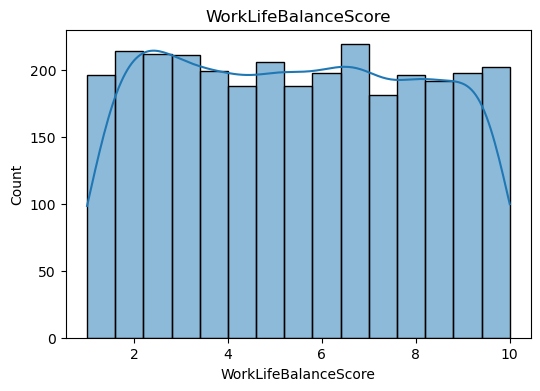

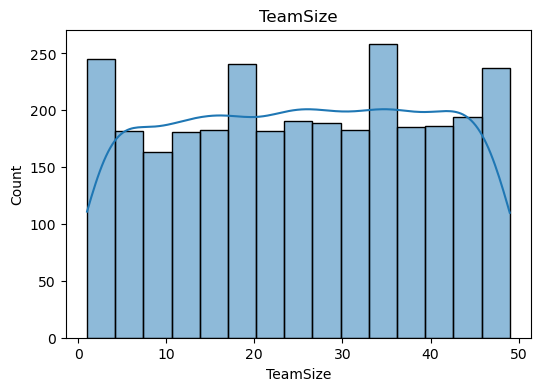

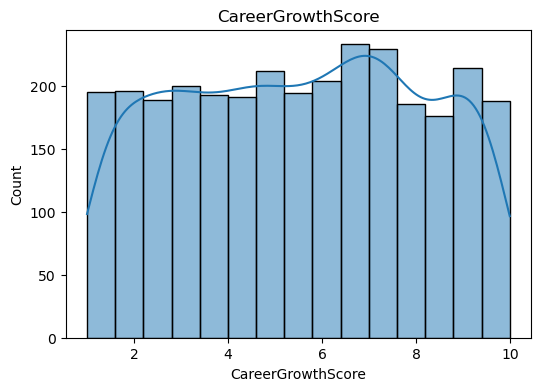

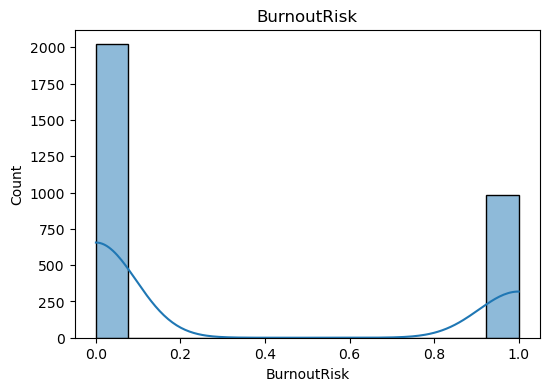

In [5]:
def getHist(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(col)
        plt.show()

getHist(df, numerical_cols)

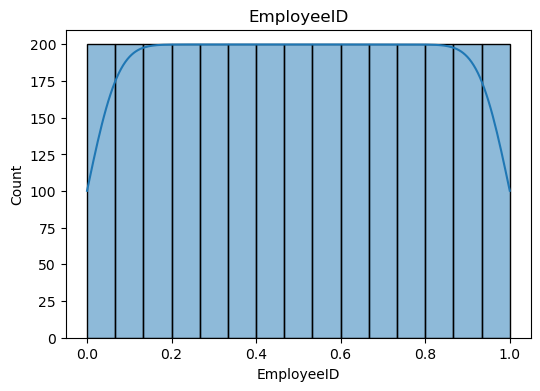

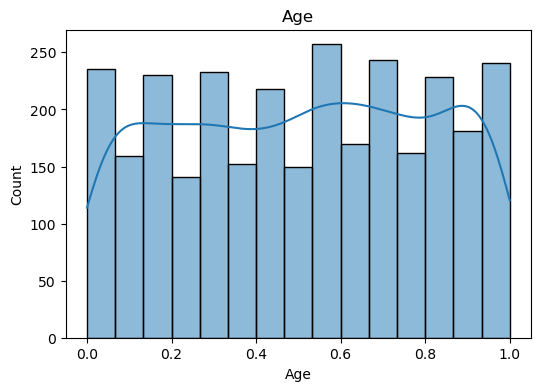

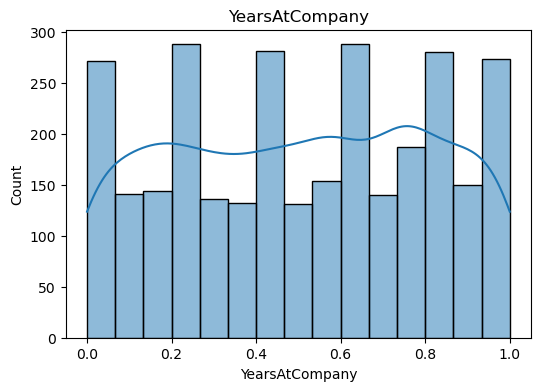

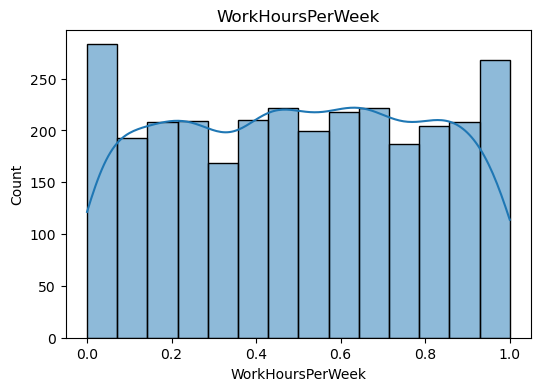

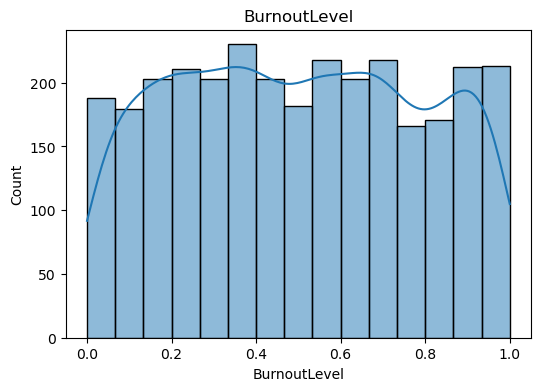

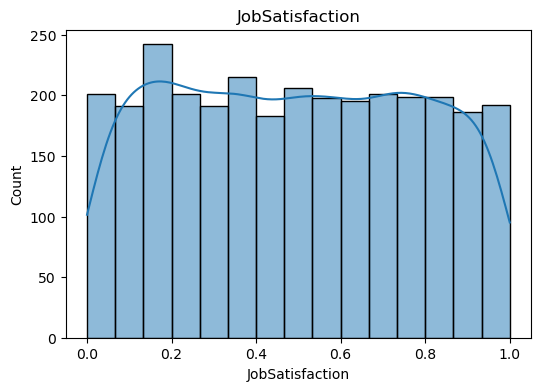

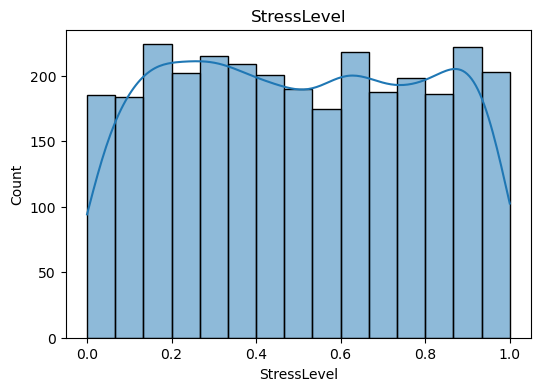

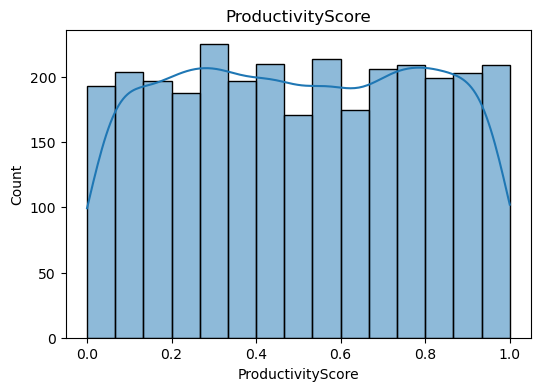

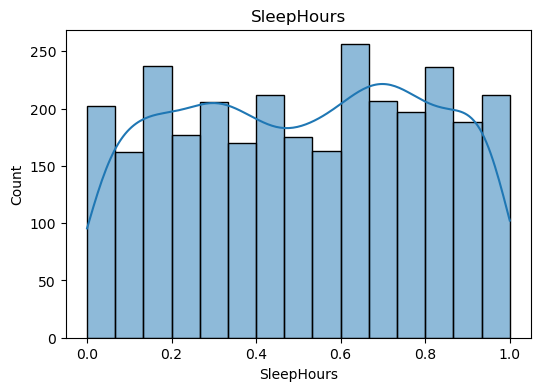

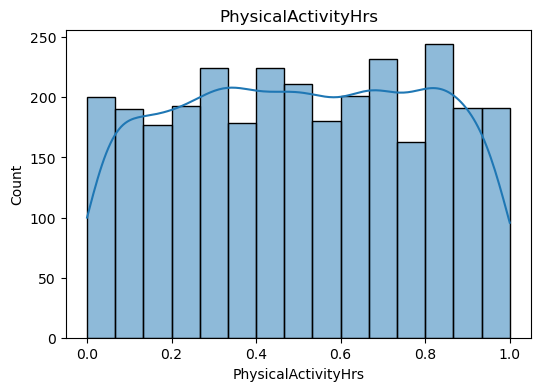

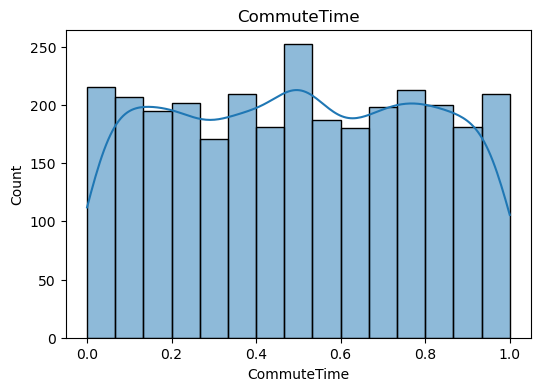

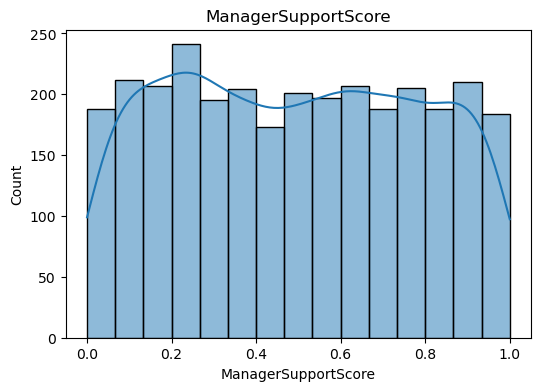

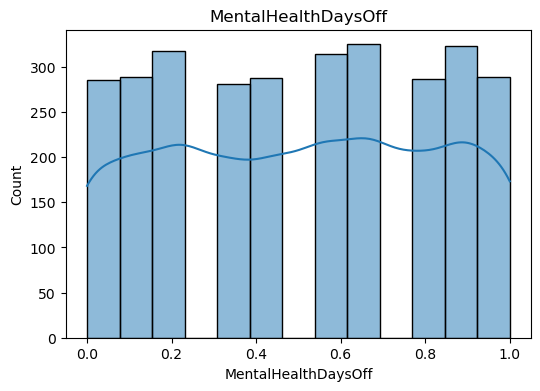

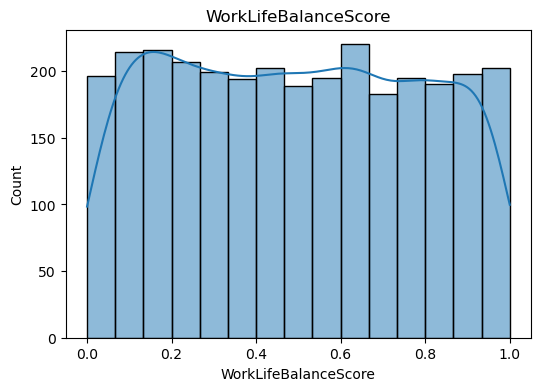

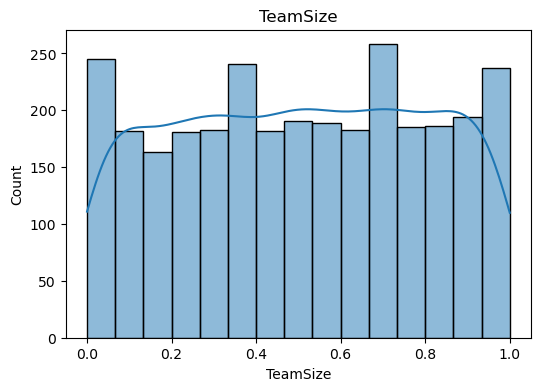

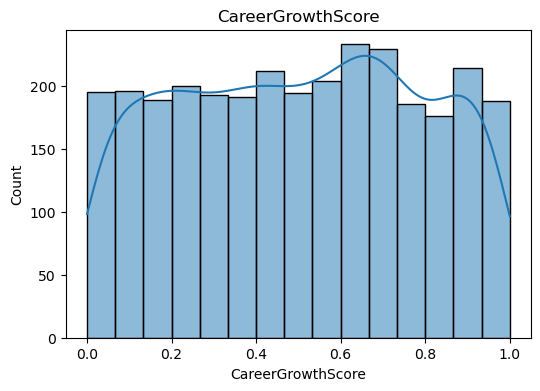

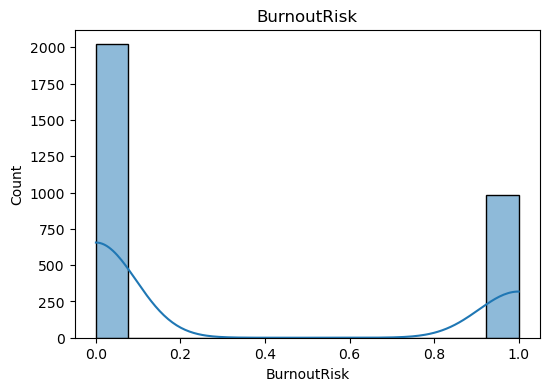

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_maxScaler = MinMaxScaler()
df[numerical_cols] = min_maxScaler.fit_transform(df[numerical_cols])
getHist(df, numerical_cols)

In [7]:
# from scipy.stats import boxcox
# for col in numerical_cols: 
#     boxcox(df[col])

In [8]:
from scipy.stats import boxcox
import numpy as np
for col in numerical_cols: 
    sum = 0
    for x in df[col]:
        if np.any(x <= 0):
            sum += 1
    print(sum)

1
74
157
85
1
4
1
2
31
11
28
1
286
1
65
2
2020


As there are 0's in the data we cant use boxcox. Instead we can use power transformation/ Yeo-Johnson transformation

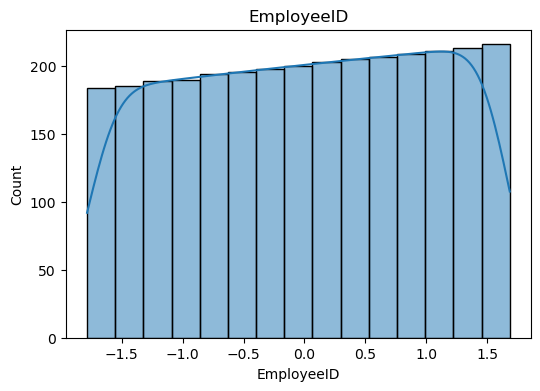

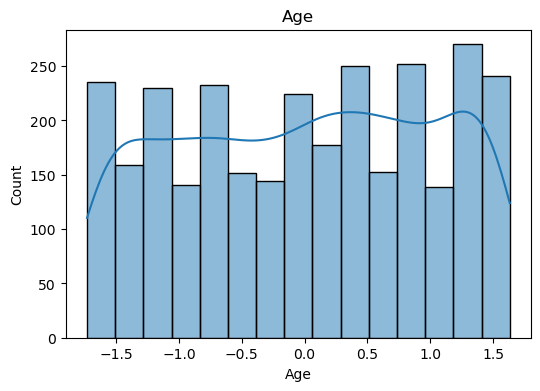

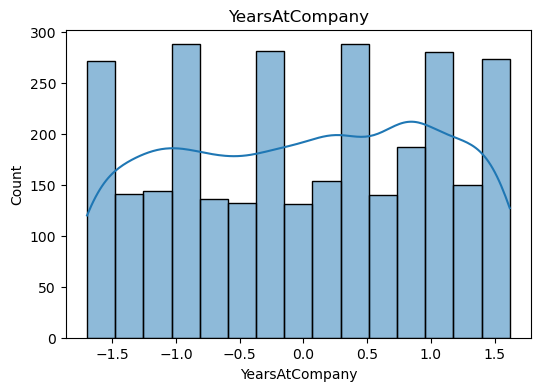

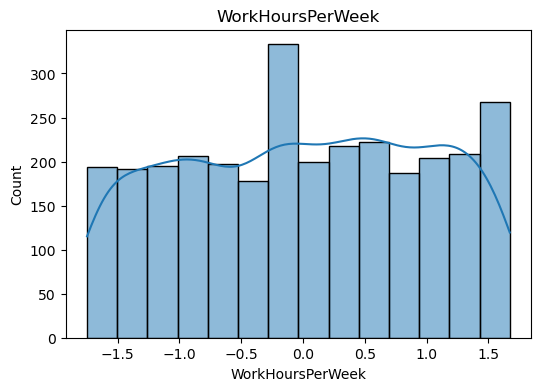

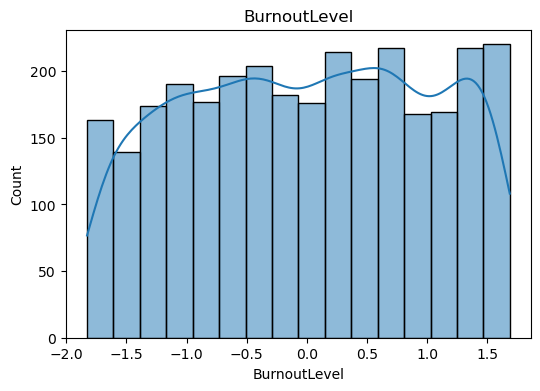

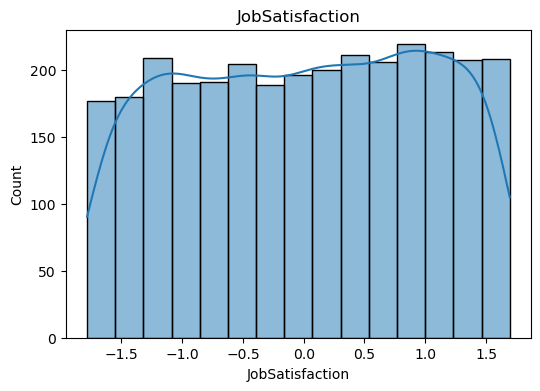

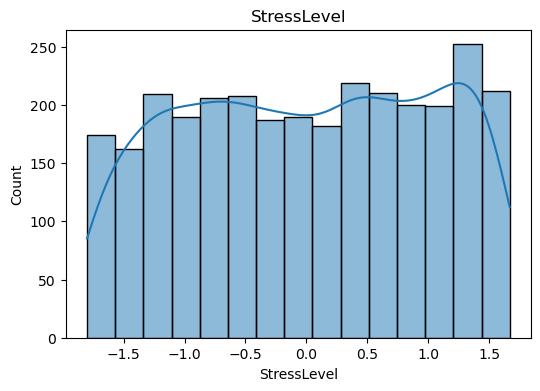

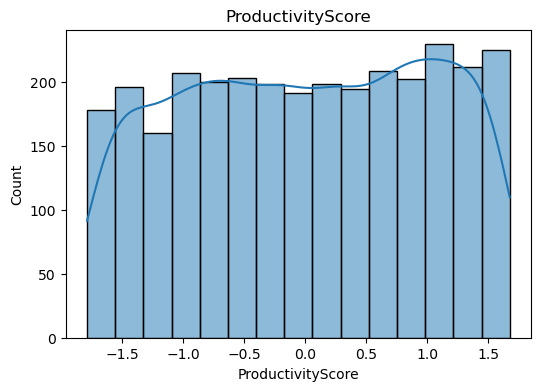

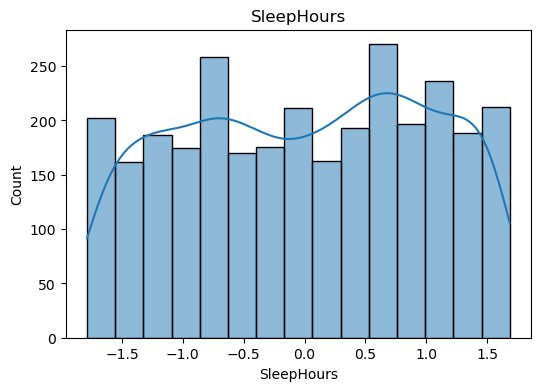

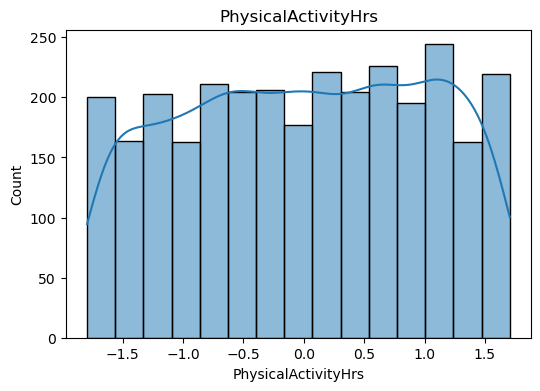

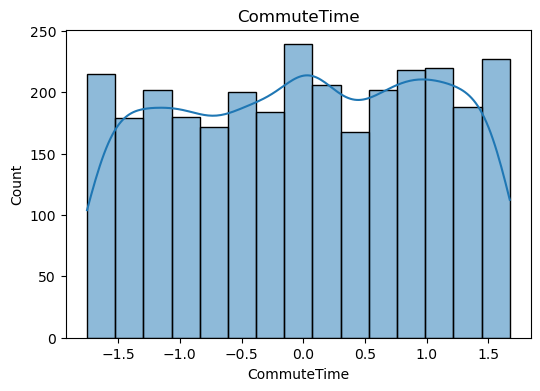

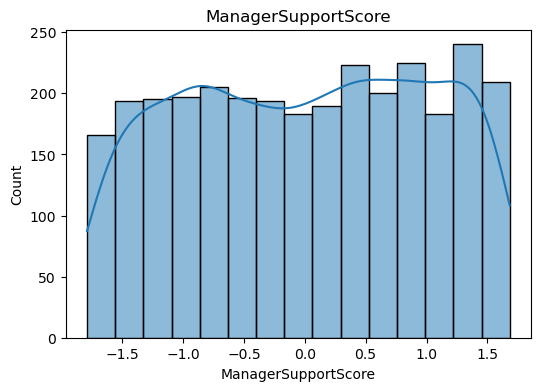

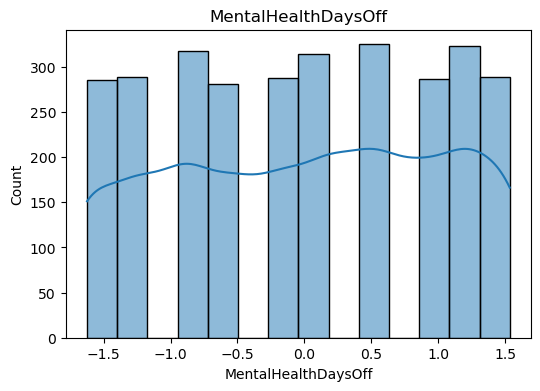

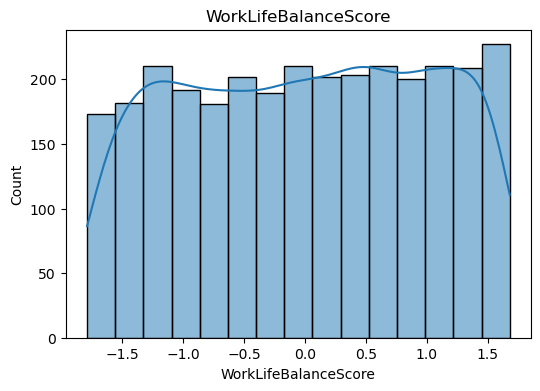

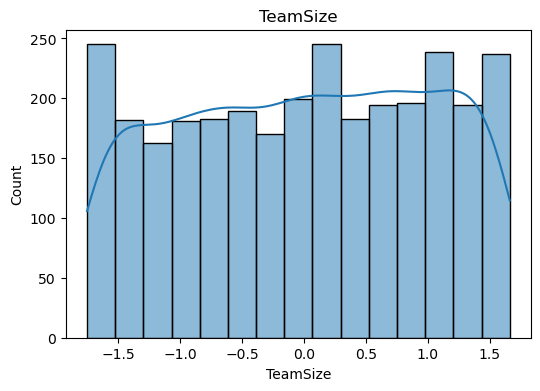

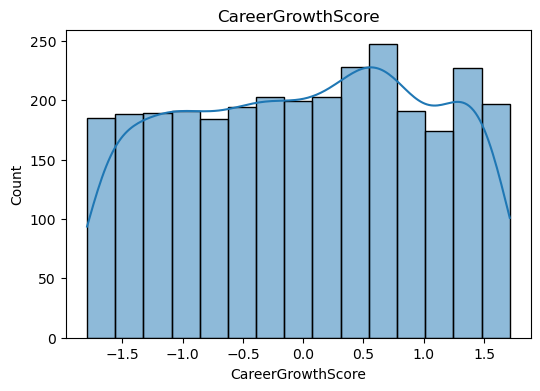

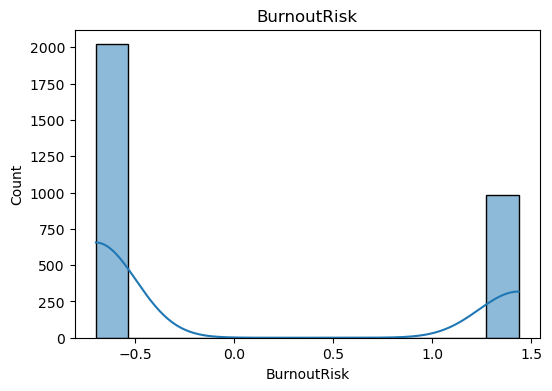

In [9]:
from sklearn.preprocessing import PowerTransformer

powertransformer = PowerTransformer()
df[numerical_cols] = powertransformer.fit_transform(df[numerical_cols])

getHist(df, numerical_cols)

In [10]:
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,-1.785013,0.837407,Male,UK,Sales Associate,HR,0.652798,0.310344,No,-0.818930,...,1.619843,No,-0.872439,Yes,1.200451,40K-60K,1.271151,-1.376356,1.418135,-0.696526
1,-1.783739,-0.426252,Male,Germany,Software Engineer,IT,-1.524362,1.672862,Hybrid,0.743613,...,-1.500741,Yes,-0.369535,Yes,-0.171427,80K-100K,-1.018258,1.389604,1.139717,1.435697
2,-1.782466,-1.072662,Non-binary,India,IT Admin,IT,0.489711,1.672862,Hybrid,0.635841,...,0.470828,No,-0.676993,No,0.522849,80K-100K,0.718667,-1.302019,0.950545,1.435697
3,-1.781192,0.119659,Male,Australia,HR Specialist,IT,0.815275,-1.620564,Yes,-0.490994,...,-0.445724,Yes,-0.330126,Yes,1.533743,60K-80K,-1.651795,-1.006857,1.305482,-0.696526
4,-1.779919,-0.061540,Male,Brazil,Customer Support,Support,-0.670962,-1.245946,Yes,1.070242,...,-0.011078,Yes,0.061632,Yes,0.522849,<40K,-1.713148,-0.498092,1.297962,1.435697


In [11]:
for col in categorical_cols:
    print(col, df[col].unique())

Gender ['Male' 'Non-binary' 'Prefer not to say' 'Female']
Country ['UK' 'Germany' 'India' 'Australia' 'Brazil' 'USA' 'Canada']
JobRole ['Sales Associate' 'Software Engineer' 'IT Admin' 'HR Specialist'
 'Customer Support' 'Project Manager' 'Marketing Manager' 'Data Scientist']
Department ['HR' 'IT' 'Support' 'Engineering' 'Marketing' 'Sales']
RemoteWork ['No' 'Hybrid' 'Yes']
HasMentalHealthSupport ['No' 'Yes']
HasTherapyAccess ['Yes' 'No']
SalaryRange ['40K-60K' '80K-100K' '60K-80K' '<40K' '100K+']


In [12]:
nominal_col = ['Gender', 'Country', 'JobRole', 'Department']
ordianl_col = ['RemoteWork', 'HasMentalHealthSupport', 'HasTherapyAccess', 'SalaryRange']

In [13]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()
arr = oneHotEncoder.fit(df[nominal_col])
features = oneHotEncoder.get_feature_names_out()
df[features] = oneHotEncoder.transform(df[nominal_col]).toarray()

In [14]:
df[features].head()

,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Country_Australia,Country_Brazil,Country_Canada,Country_Germany,Country_India,Country_UK,...,JobRole_Marketing Manager,JobRole_Project Manager,JobRole_Sales Associate,JobRole_Software Engineer,Department_Engineering,Department_HR,Department_IT,Department_Marketing,Department_Sales,Department_Support
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployeeID                 3000 non-null   float64
 1   Age                        3000 non-null   float64
 2   Gender                     3000 non-null   object 
 3   Country                    3000 non-null   object 
 4   JobRole                    3000 non-null   object 
 5   Department                 3000 non-null   object 
 6   YearsAtCompany             3000 non-null   float64
 7   WorkHoursPerWeek           3000 non-null   float64
 8   RemoteWork                 3000 non-null   object 
 9   BurnoutLevel               3000 non-null   float64
 10  JobSatisfaction            3000 non-null   float64
 11  StressLevel                3000 non-null   float64
 12  ProductivityScore          3000 non-null   float64
 13  SleepHours                 3000 non-null   float

In [16]:
df.drop(labels=nominal_col, inplace=True, axis= 1)

- RemoteWork ['No' 'Hybrid' 'Yes']
- HasMentalHealthSupport ['No' 'Yes']
- HasTherapyAccess ['Yes' 'No']
- SalaryRange ['40K-60K' '80K-100K' '60K-80K' '<40K' '100K+']

In [17]:
df['RemoteWork'] = df['RemoteWork'].map({'No': 1, 'Hybrid': 2, 'Yes': 3})
df['HasMentalHealthSupport'] = df['HasMentalHealthSupport'].map({'No': 1, 'Yes': 2})
df['HasTherapyAccess'] = df['HasTherapyAccess'].map({'No': 1, 'Yes': 2})
df['SalaryRange'] = df['SalaryRange'].map({'40K-60K': 1, '80K-100K': 2, '60K-80K': 3, '<40K': 4, '100K+': 5})

In [18]:
df[ordianl_col].head()

,RemoteWork,HasMentalHealthSupport,HasTherapyAccess,SalaryRange
0,1,1,2,1
1,2,2,2,2
2,2,1,1,2
3,3,2,2,3
4,3,2,2,4


In [19]:
from sklearn.feature_selection import mutual_info_classif

X = df.loc[:, df.columns != 'StressLevel']
y = df.loc[:, df.columns == 'StressLevel']

## mutual_info_classif is used for classification and not for regression.

In [35]:
from sklearn.feature_selection import mutual_info_regression

info = mutual_info_regression(X, y.values.ravel())
values = pd.Series(info, index=X.columns).sort_values(ascending=False)

scores = pd.Series(values[values > 0.01])
scores

Department_IT                0.019049
JobRole_HR Specialist        0.017047
JobRole_Marketing Manager    0.011630
dtype: float64

In [36]:
selected_features = scores.index.to_list()
selected_features

['Department_IT', 'JobRole_HR Specialist', 'JobRole_Marketing Manager']

In [37]:
X_selected = X[selected_features]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size= 0.2)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg = model.predict(X_test)
mean_error_reg = mean_squared_error(y_true=y_test, y_pred=y_pred_reg)
r2_reg= r2_score(y_true=y_test, y_pred= y_pred_reg)

print(mean_error_reg, r2_reg)

1.0435768823235794 0.001157918896413146


In [52]:
from sklearn.linear_model import Lasso
model = Lasso(alpha= 0.001)
model.fit(X=X_train, y=y_train)


Lasso(alpha=0.001)

In [53]:
y_pred_lasso = model.predict(X_test)
mean_error_lasso = mean_squared_error(y_true=y_test, y_pred=y_pred_lasso)
r2_lasso= r2_score(y_true=y_test, y_pred= y_pred_lasso)

print(mean_error_lasso, r2_lasso)

1.0437957777747753 0.0009484067926859296


In [54]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.001)
model.fit(X=X_train, y=y_train)

Ridge(alpha=0.001)

In [55]:
y_pred_ridge = model.predict(X_test)
mean_error_ridge = mean_squared_error(y_true=y_test, y_pred=y_pred_ridge)
r2_ridge= r2_score(y_true=y_test, y_pred= y_pred_ridge)

print(mean_error_ridge, r2_ridge)

1.0435768830232626 0.0011579182267231758


In [56]:
df.to_csv('after_day2.csv')